<a href="https://colab.research.google.com/github/Dushyanty/YBIF/blob/main/capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Attention.csv')

In [3]:
df.head() 

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60 non-null     int64  
 1   subject     60 non-null     int64  
 2   attention   60 non-null     object 
 3   solutions   60 non-null     int64  
 4   score       60 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.5+ KB


In [5]:
df.columns

Index(['Unnamed: 0', 'subject', 'attention', 'solutions', 'score'], dtype='object')

In [6]:
df.describe()

,Unnamed: 0,subject,solutions,score
count,60.000000,60.000000,60.000000,60.000000
mean,29.500000,10.500000,2.000000,5.958333
std,17.464249,5.814943,0.823387,1.621601
min,0.000000,1.000000,1.000000,2.000000
25%,14.750000,5.750000,1.000000,5.000000
50%,29.500000,10.500000,2.000000,6.000000
75%,44.250000,15.250000,3.000000,7.000000
max,59.000000,20.000000,3.000000,9.000000


In [7]:
df.shape

(60, 5)

In [9]:
df['attention'].value_counts()

divided    30
focused    30
Name: attention, dtype: int64

In [10]:
df.replace({'attention' :{'divided':0,'focused':1}}, inplace=True)

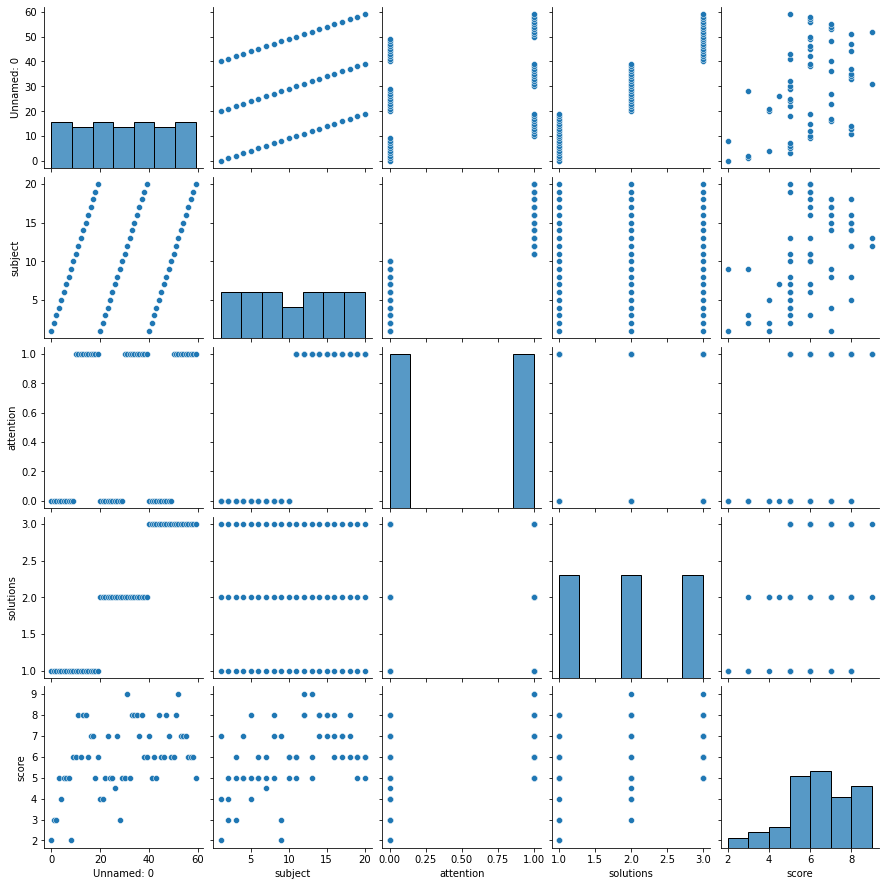

In [17]:
sns.pairplot(df)

In [11]:
X = df.drop('score',axis=1)

In [12]:
X

,Unnamed: 0,subject,attention,solutions
0,0,1,0,1
1,1,2,0,1
2,2,3,0,1
3,3,4,0,1
4,4,5,0,1
5,5,6,0,1
6,6,7,0,1
7,7,8,0,1
8,8,9,0,1
9,9,10,0,1


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
ss= StandardScaler()

In [15]:
X=ss.fit_transform(X)

In [18]:
y=df['score']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42529)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42, 4), (18, 4), (42,), (18,))

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(X_train,y_train)

LinearRegression()

In [56]:
y_pred = lr.predict(X_test)

In [57]:
y_pred

array([7.29179574, 4.55277325, 4.56707541, 5.97327064, 5.28805072,
       5.85699619, 5.2773241 , 6.00187495, 4.55634879, 6.5779715 ,
       5.87129835, 7.28106912, 5.98399726, 5.27374856, 5.29162626,
       5.84984511, 6.58154704, 5.86772281])

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [59]:
mean_squared_error(y_test,y_pred)

1.73410269749244

In [60]:
mean_absolute_error(y_test,y_pred)

1.0906349138742304

In [61]:
r2_score(y_test,y_pred)

0.39715743134382986